In [9]:
import os
import random
import shutil

from paths import src_dir

In [10]:
def add_suffix_to_path(path, suffix): 
    # Check if the path already ends with a slash
    if path.endswith('/'):
        new_path = path.rstrip('/') + suffix + '/'
    else:
        new_path = path + suffix + '/'
    return new_path

In [11]:
def random_split(parent_dir, ratio_train=0.8):
    """
    Randomly separate subdirectories within a parent directory and move them to
    separate output directories according to the given ratios.

    Parameters:
    - parent_dir: The parent directory containing subdirectories to be split.
    - ratios: A list of ratios (e.g., [0.7, 0.3]) specifying the split ratio.
    - output_dirs: A list of output directory names for the separated data.

    Returns:
    - None
    """
    # define the suffixes of the different data chunks
    suffixes = ["_train", "_validate"]

    # adding suffixes to form output directories
    output_dirs = [add_suffix_to_path(parent_dir, suffix) for suffix in suffixes]

    # count the subdirectories that will be moved
    subdirectories = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

    # Create output directories if they don't exist
    for output_dir in output_dirs:
        os.makedirs(output_dir, exist_ok=True)

    random.shuffle(subdirectories)

    # calculate the position of split
    total_dirs = len(subdirectories)
    split_point = int(ratio_train * total_dirs)

    train_dirs = subdirectories[:split_point]
    test_dirs = subdirectories[split_point:]
    both_dirs = [train_dirs, test_dirs]

    for move_idx in range(len(both_dirs)): 
        move_dirs = both_dirs[move_idx]
        output_dir = output_dirs[move_idx]

        for move_dir in move_dirs: 
            source = os.path.join(parent_dir, move_dir)
            destination = os.path.join(output_dir, move_dir)
            shutil.move(source, destination)


if __name__ == '__main__':
    random_split(os.path.join(src_dir, "try/one/"), 0.8)

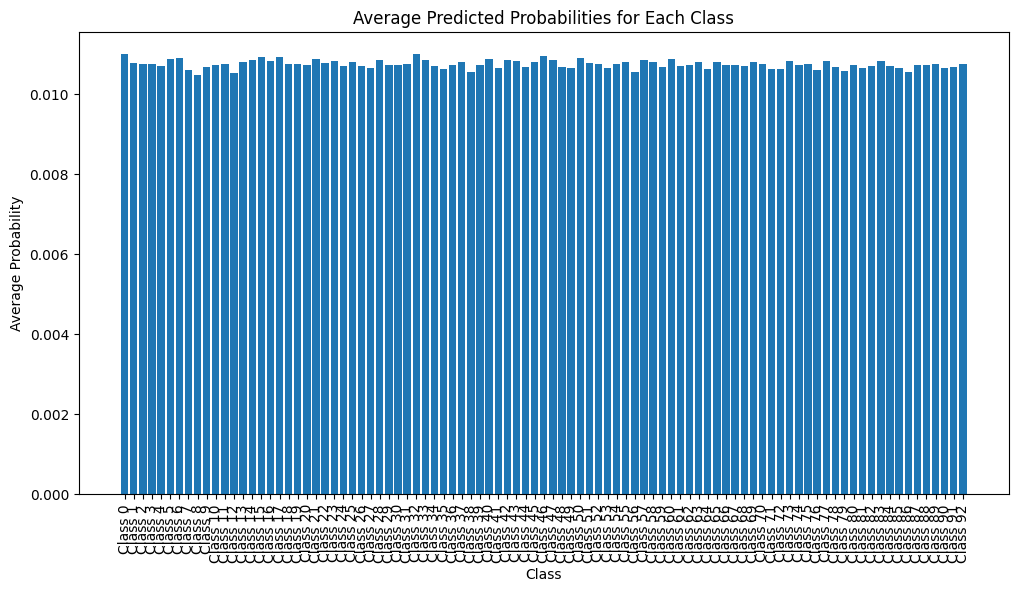

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of classes and the number of samples
num_classes = 93
num_samples = 1000

# Generate random prediction scores for each class
prediction_scores = np.random.rand(num_samples, num_classes)

# Apply softmax to get the probability distribution
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

predicted_probabilities = softmax(prediction_scores)

# Calculate the average predicted probability for each class
average_probabilities = np.mean(predicted_probabilities, axis=0)

# Plot the average predicted probabilities
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), average_probabilities)
plt.title("Average Predicted Probabilities for Each Class")
plt.xlabel("Class")
plt.ylabel("Average Probability")
plt.xticks(range(num_classes), [f"Class {i}" for i in range(num_classes)], rotation=90)
plt.show()


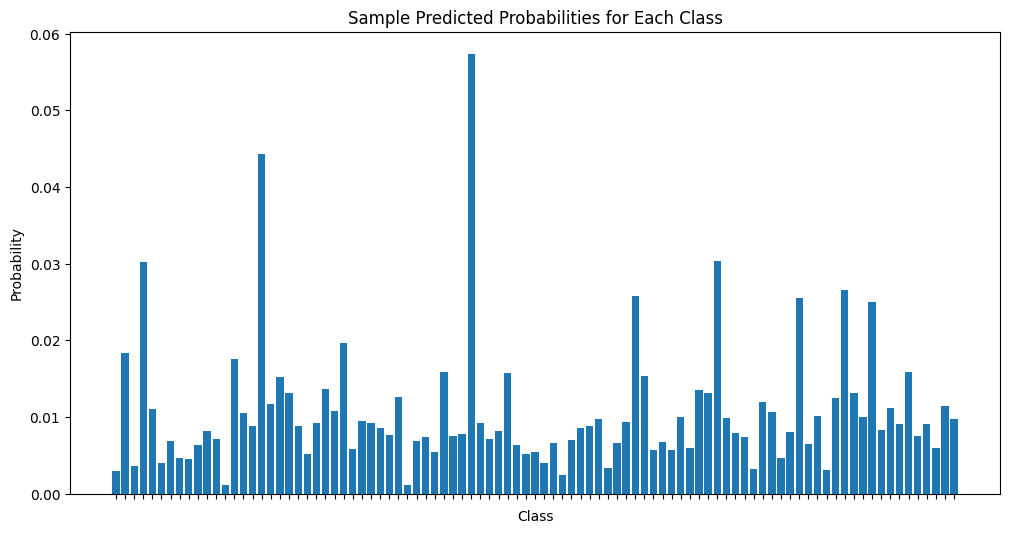

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of classes and the number of samples
num_classes = 93
num_samples = 1

# Generate random means and standard deviations for each class
class_means = np.random.rand(num_classes)
class_stdevs = np.random.rand(num_classes)

# Generate random prediction scores for each class using normal distribution
prediction_scores = np.random.normal(class_means, class_stdevs, size=(num_samples, num_classes))

# Apply softmax to get the probability distribution
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

predicted_probabilities = softmax(prediction_scores)

# Calculate the average predicted probability for each class
average_probabilities = np.mean(predicted_probabilities, axis=0)

# Plot the average predicted probabilities
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), average_probabilities)
plt.title("Sample Predicted Probabilities for Each Class")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(num_classes), [f"" for i in range(num_classes)], rotation=90)
plt.show()
